# Plots of CCLM domains

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import valenspy as vp
import numpy as np

# define machine name - used for paths of (observational) datasets
machine = 'hortense'

# reference dataset to compare to
model = 'CCLM'


manager = vp.InputManager(machine=machine)

years_to_analyse = range(1980,1981)


In [3]:
# load CPM simulation to extract domain rlat and rlons

ds_mod_cpm = manager.load_data(model, ['tas'], freq="daily", path_identifiers=["BE28_Nukleus", "mean"])

def extract_border_rlatlon(ds_belgium):
    # Extract the rlat/rlon of the outermost rows and columns (the border of the Belgian domain)
    rlat_border = xr.concat([ds_belgium['rlat'].isel(rlat=0),
                             ds_belgium['rlat'].isel(rlat=-1)], dim='points')

    rlon_border = xr.concat([ds_belgium['rlon'].isel(rlon=0), 
                             ds_belgium['rlon'].isel(rlon=-1),], dim='points')

    return rlat_border.values, rlon_border.values

rlat_border, rlon_border = extract_border_rlatlon(ds_mod_cpm.isel(time=1))


File paths found:
/dodrio/scratch/projects/2022_200/project_output/rcs/CORDEXBE2/postprocessing/BE28_Nukleus/T_2M/daily/T_2M_daymean.nc
Variable metadata is missing or incorrect
The file is NOT ValEnsPy CF compliant.
33.33% of the variables are ValEnsPy CF compliant
ValEnsPy CF compliant: ['tas']
Unknown to ValEnsPy: ['time_bnds', 'rotated_pole']


In [8]:
d_border_values = {}
d_border_values_mean = {}
d_border_values_mean_experiment = {}
variables = ['ta850','ta700','ta500','ta250']
experiment = 'CB2_CCLM_EUR11_ERA5_evaluation_urb'

pressure_levels = [850,700,500,250]

for variable in variables: 
    print(variable)
    ds_eur11 = manager.load_data(model, [variable], freq="daily", path_identifiers=[experiment, "mean", [str(year) for year in years_to_analyse]])


    da_eur11 = ds_eur11[variable].sel(time = ds_eur11.time.dt.year.isin(years_to_analyse)).mean('time')

    # from the EUR11 simulaiton, extract the borders 

    europe_subset = da_eur11.sel(rlat=slice(rlat_border[0], rlat_border[1]), 
                                rlon=slice(rlon_border[0], rlon_border[1]))

    bottom =  europe_subset.isel(rlat=0).squeeze().values
    top =  europe_subset.isel(rlat=-1).squeeze().values
    left = europe_subset.isel(rlon=0).squeeze().values
    right = europe_subset.isel(rlon=-1).squeeze().values

    # merge all into one 1D array
    border_values = np.concat([np.array([bottom, top]).ravel(),np.array([left,right]).ravel()])
    border_values_mean = np.mean(border_values)

    d_border_values[experiment+'_'+variable] = border_values
    d_border_values_mean_experiment[variable] = border_values_mean
    d_border_values_mean[experiment] = d_border_values_mean_experiment

ta850


FileNotFoundError: No files found for dataset CCLM, variables ['ta850'], period None, frequency daily, region None and path_identifiers ['CB2_CCLM_EUR11_ERA5_evaluation_urb', 'mean', '1981'].

In [ ]:
d_border_values = {}
d_border_values_mean = {}
d_border_values_mean_experiment = {}
variables = ['ta850','ta700','ta500','ta250']
experiment = 'CB2_CCLM_EUR11_ERA5_evaluation'

pressure_levels = [850,700,500,250]

for variable in variables: 
    print(variable)
    ds_eur11 = manager.load_data(model, [variable], freq="daily", path_identifiers=[experiment, "mean", [str(year) for year in years_to_analyse]])


    da_eur11 = ds_eur11[variable].sel(time = ds_eur11.time.dt.year.isin(years_to_analyse)).mean('time')

    # from the EUR11 simulaiton, extract the borders 

    europe_subset = da_eur11.sel(rlat=slice(rlat_border[0], rlat_border[1]), 
                                rlon=slice(rlon_border[0], rlon_border[1]))

    bottom =  europe_subset.isel(rlat=0).squeeze().values
    top =  europe_subset.isel(rlat=-1).squeeze().values
    left = europe_subset.isel(rlon=0).squeeze().values
    right = europe_subset.isel(rlon=-1).squeeze().values

    # merge all into one 1D array
    border_values = np.concat([np.array([bottom, top]).ravel(),np.array([left,right]).ravel()])
    border_values_mean = np.mean(border_values)

    d_border_values[experiment+'_'+variable] = border_values
    d_border_values_mean_experiment[variable] = border_values_mean
    d_border_values_mean[experiment] = d_border_values_mean_experiment

ta850
File paths found:
/dodrio/scratch/projects/2022_200/project_output/rcs/CORDEXBE2/postprocessing/CB2_CCLM_EUR11_ERA5_evaluation_urb/T850p/daily/T850p_daymean.nc
Variable metadata is missing or incorrect
The file is NOT ValEnsPy CF compliant.
33.33% of the variables are ValEnsPy CF compliant
ValEnsPy CF compliant: ['ta850']
Unknown to ValEnsPy: ['time_bnds', 'rotated_pole']
ta700
File paths found:
/dodrio/scratch/projects/2022_200/project_output/rcs/CORDEXBE2/postprocessing/CB2_CCLM_EUR11_ERA5_evaluation_urb/T700p/daily/T700p_daymean.nc
Variable metadata is missing or incorrect
The file is NOT ValEnsPy CF compliant.
33.33% of the variables are ValEnsPy CF compliant
ValEnsPy CF compliant: ['ta700']
Unknown to ValEnsPy: ['time_bnds', 'rotated_pole']
ta500
File paths found:
/dodrio/scratch/projects/2022_200/project_output/rcs/CORDEXBE2/postprocessing/CB2_CCLM_EUR11_ERA5_evaluation_urb/T500p/daily/T500p_daymean.nc
Variable metadata is missing or incorrect
The file is NOT ValEnsPy CF co

NameError: name 'experiments' is not defined

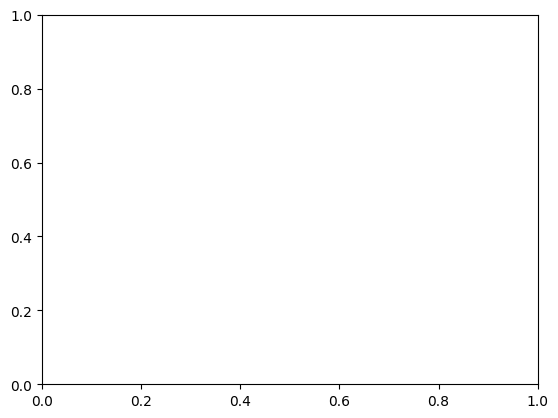

In [4]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots()
experiments = ['CB2_CCLM_EUR11_ERA5_evaluation','CB2_CCLM_EUR11_ERA5_evaluation_urb']

for experiment in experiments: 
    mean_values_per_pressure = [p for key,p in d_border_values_mean[experiment].items()]
    ax.plot(mean_values_per_pressure, pressure_levels, label=experiment)

    ax.set_title('T at different pressure levels for border cells', loc='right')
    ax.set_ylabel('pressure levels (hPa)')
    ax.legend()